In [8]:
import os

import warnings 
warnings.filterwarnings('ignore')


# for data analytics
import pandas as pd
import numpy as np
from collections import Counter

# for visualizations
#import seaborn as sns
import matplotlib.pyplot as plt

# for data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# imblean provides tools for us to deal with imbalanced class sizes
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

# # For entropy computation
# from pyitlib import discrete_random_variable as drv

from scipy import stats
import missingno
from sklearn import preprocessing

# TEXT EDA
# from wordcloud import WordCloud

# import spacy
# from spacy.lang.en.stop_words import STOP_WORDS
# from spacy.lang.en import English

#import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 100
#import matplotlib.gridspec as gridspec
#import seaborn as sns; sns.set()
import ast

from datetime import date, time, datetime
import calendar

import pandas as pd
import emoji
import regex as re
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from deep_translator import GoogleTranslator


import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sabrina/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sabrina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
reviewer_reviews = pd.read_csv('../cleaning/cleaned_reviewer_reviews.csv', index_col=0)

In [10]:
reviewer_reviews.head(5)

,name,address,review,date,link,reviewer,keep,cleaned_text
12,Kazoku Japanese Cuisine,"1 Goldhill Plaza, Singapore ...",\n1-for-1 Don\nKazoku Chirashi Don (S$29.90++)...,4d ago,https://www.burpple.com/kazoku-japanese-cuisin...,alamakgirl,1,kazoku chirashi s2990 thick slice tuna salmon ...
31,Tigerlily Patisserie,"350 Joo Chiat Road, Singapore ...","\nBrunch\nBeehive (S$15+)\nLemon, thyme and ly...",Feb 26 at 12:44pm,https://www.burpple.com/tigerlily-patisserie?b...,alamakgirl,1,beehive s15 lemon thyme lychee honey jelly lig...
32,Putien (Northpoint City) ...,"930 Yishun Avenue 2, Singapore ...",\nBirthday Treat \n20% discount \nValid during...,Feb 24 at 10:47pm,https://www.burpple.com/putien-8?bp_ref=%2Ff%2...,alamakgirl,1,20 discount valid birthday month member starte...
35,Our Tampines Hub Hawker Centre (...,"1 Tampines Walk, Singapore ...",\nSet C\nSet C (S$2.50)\n‘Cos it’s Friday \nGo...,Feb 24 at 8:33am,https://www.burpple.com/our-tampines-hub?bp_re...,alamakgirl,1,set c s250 co friday s250 cashback pay paylah ...
51,Hokkaido Ramen Santouka (Clarke ...,"6 Eu Tong Sen Street, Singapore ...",\nBirthday Treat\n50% off Tokusen Toroniku Ram...,Feb 19 at 12:27pm,https://www.burpple.com/hokkaido-ramen-santouk...,alamakgirl,1,50 tokusen toroniku ramen s23 s1150 need redee...


## Num of reviews grouped by restaurant

In [11]:
num_by_reviewer= reviewer_reviews.groupby(['reviewer']).count()
num_by_reviewer

,name,address,review,date,link,keep,cleaned_text
reviewer,,,,,,,
Eatravel,572,572,572,572,572,572,572
MightyFoodie,435,435,435,435,435,435,435
Vanessa_Kou,326,326,326,326,326,326,326
alamakgirl,606,606,606,606,606,606,606
juliuslim,419,419,419,419,419,419,419
thefoodcompendium,1761,1761,1761,1761,1761,1761,1761
thiampeng,808,808,808,808,808,808,808
veronicaphua,434,430,434,434,434,434,434


Text(0.5, 1.0, 'Number of Reviews by Reviewers')

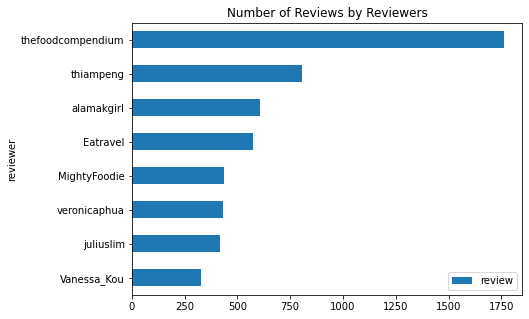

In [12]:
num_by_reviewer_df = pd.DataFrame(num_by_reviewer['review']).sort_values('review')
num_by_reviewer_df.plot(kind='barh',figsize=(7,5))
plt.title('Number of Reviews by Reviewers')

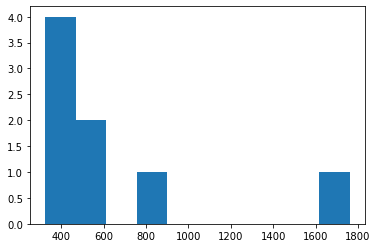

In [13]:
plt.hist(num_by_reviewer.review)
plt.show()

In [14]:
num_by_res= reviewer_reviews.groupby([reviewer_reviews.name]).count()
num_by_res

,address,review,date,link,reviewer,keep,cleaned_text
name,,,,,,,
% Arabica (Arab Street),1,1,1,1,1,1,1
% Arabica (Chip Bee Gardens),4,4,4,4,4,4,4
108 Matcha Saro (Suntec City),5,5,5,5,5,5,5
136 Hong Kong Street Fish Head Steamboat (Joo Seng),1,1,1,1,1,1,1
15 Stamford by Alvin Leung,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
Shake Shack (Suntec City),1,1,1,1,1,1,1
The Coconut Club (Beach Road),1,1,1,1,1,1,1
The Frontier (NUS Science Canteen),1,1,1,1,1,1,1


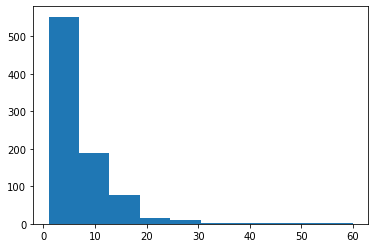

In [15]:
plt.hist(num_by_res.review)
plt.show()

## Word Cloud for reviews for each reviewer and combined

#### word cloud for combined reviews

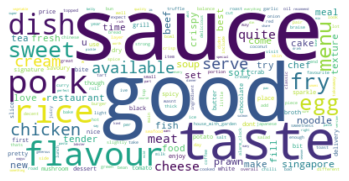

In [16]:
#Importing Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import string
from wordcloud import WordCloud, STOPWORDS

# drop address, note, tel, website, Open in reviews
words = []
for review in reviewer_reviews.cleaned_text:
    for r in review.split(" "):
        if 'Address' not in r and 'Note' not in r and 'Tel' not in r and 'Website' not in r and 'Open' not in r and 'S' not in r:
            words.append(r)

text = " ".join(" ".join(review.split(" ")) for review in words)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### word cloud for each reviewer

In [17]:
unique_reviewers = reviewer_reviews['reviewer'].unique()

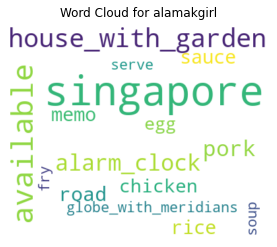

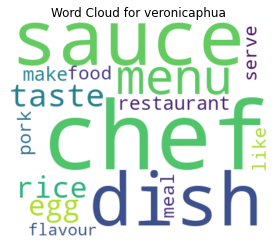

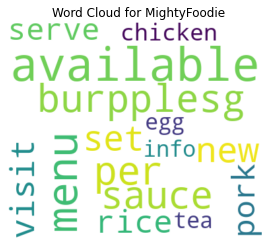

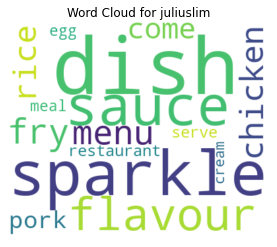

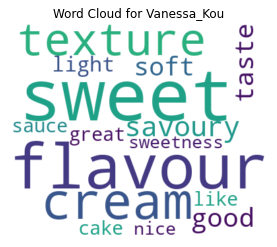

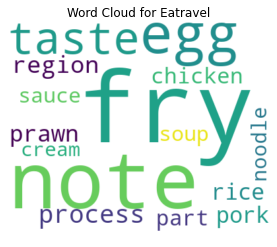

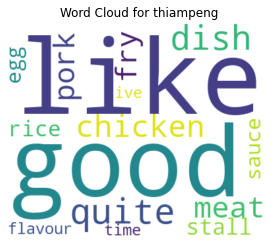

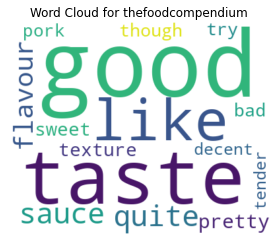

In [24]:
# word cloud for each reviewer
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['u','w'])

for r in unique_reviewers:
    temp = reviewer_reviews[reviewer_reviews["reviewer"] == r]
    words = []
    for i in temp.cleaned_text:
        words.append(i)
    #Creating the text variable
    #text = " ".join("".join(review.translate(str.maketrans('','',string.punctuation)).split(" ")) for review in words)
    text = " ".join(" ".join(review.split(" ")) for review in words)
    # Creating word_cloud with text as argument in .generate() method
    word_cloud = WordCloud(width=400, height=330, max_words=15,collocations = False, stopwords= stopwords,background_color = 'white').generate(text)
    # Display the generated Word Cloud
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    title = f"Word Cloud for {r}"
    plt.title(title)
    plt.show()



## Count and plot frequency of post by each reviewer per month

In [25]:
reviewer_reviews['cleaned_date'] = reviewer_reviews.apply(lambda x: 'Mar 2023' if 'ago' in x['date'] else str(x['date'].split("at")[0]+" 2023") if 'at' in x['date'] else str(x['date'].split(", ")[0]+" "+x['date'].split(", ")[-1]), axis = 1)
reviewer_reviews['mmyyyy'] = reviewer_reviews.apply(lambda x: x['cleaned_date'].strip()[:3]+ x['cleaned_date'].strip()[-4:], axis = 1)
reviewer_reviews['DATE'] = pd.to_datetime(reviewer_reviews['mmyyyy'],format='%b%Y')
reviewer_reviews

,name,address,review,date,link,reviewer,keep,cleaned_text,cleaned_date,mmyyyy,DATE
12,Kazoku Japanese Cuisine,"1 Goldhill Plaza, Singapore ...",\n1-for-1 Don\nKazoku Chirashi Don (S$29.90++)...,4d ago,https://www.burpple.com/kazoku-japanese-cuisin...,alamakgirl,1,kazoku chirashi s2990 thick slice tuna salmon ...,Mar 2023,Mar2023,2023-03-01
31,Tigerlily Patisserie,"350 Joo Chiat Road, Singapore ...","\nBrunch\nBeehive (S$15+)\nLemon, thyme and ly...",Feb 26 at 12:44pm,https://www.burpple.com/tigerlily-patisserie?b...,alamakgirl,1,beehive s15 lemon thyme lychee honey jelly lig...,Feb 26 2023,Feb2023,2023-02-01
32,Putien (Northpoint City) ...,"930 Yishun Avenue 2, Singapore ...",\nBirthday Treat \n20% discount \nValid during...,Feb 24 at 10:47pm,https://www.burpple.com/putien-8?bp_ref=%2Ff%2...,alamakgirl,1,20 discount valid birthday month member starte...,Feb 24 2023,Feb2023,2023-02-01
35,Our Tampines Hub Hawker Centre (...,"1 Tampines Walk, Singapore ...",\nSet C\nSet C (S$2.50)\n‘Cos it’s Friday \nGo...,Feb 24 at 8:33am,https://www.burpple.com/our-tampines-hub?bp_re...,alamakgirl,1,set c s250 co friday s250 cashback pay paylah ...,Feb 24 2023,Feb2023,2023-02-01
51,Hokkaido Ramen Santouka (Clarke ...,"6 Eu Tong Sen Street, Singapore ...",\nBirthday Treat\n50% off Tokusen Toroniku Ram...,Feb 19 at 12:27pm,https://www.burpple.com/hokkaido-ramen-santouk...,alamakgirl,1,50 tokusen toroniku ramen s23 s1150 need redee...,Feb 19 2023,Feb2023,2023-02-01
...,...,...,...,...,...,...,...,...,...,...,...
4473,Paradise Dynasty (Westgate) ...,"3 Gateway Drive, Singapore ...","\nBaby Spinach Vermicelli 5.5++\nAgain, light ...","Jan 2, 2020",https://www.burpple.com/paradise-dynasty-10?bp...,thefoodcompendium,1,light somehow satisfy mom love esp sweetness s...,Jan 2 2020,Jan2020,2020-01-01
4474,Paradise Dynasty (Westgate) ...,"3 Gateway Drive, Singapore ...",\nChengdu Salivating Chicken 10.8++\nWow this ...,"Jan 2, 2020",https://www.burpple.com/paradise-dynasty-10?bp...,thefoodcompendium,1,wow pretty solid quite faithful classic flavou...,Jan 2 2020,Jan2020,2020-01-01
4475,Paradise Dynasty (Westgate) ...,"3 Gateway Drive, Singapore ...",\nStewed Bamboo Shoots 7.8++\nWow this wasnt w...,"Jan 2, 2020",https://www.burpple.com/paradise-dynasty-10?bp...,thefoodcompendium,1,wow wasnt expect lightly quite delicious mild ...,Jan 2 2020,Jan2020,2020-01-01
4476,Paradise Dynasty (Westgate) ...,"3 Gateway Drive, Singapore ...",\nDan Dan Mian 8.8++\nReally restaurant standa...,"Jan 2, 2020",https://www.burpple.com/paradise-dynasty-10?bp...,thefoodcompendium,1,restaurant standard basically play rather safe...,Jan 2 2020,Jan2020,2020-01-01


In [27]:
cal_dict = dict((month, index) for index, month in enumerate(calendar.month_abbr) if month)
cleaned_dates = []
for idx, row in reviewer_reviews.iterrows():
    dt = row['date'].strip()
    if 'ago' in dt:
        if 'm' in dt or 'h' in dt or 's' in dt:
            cleaned_dates.append(date(2023, 3, 15))
        elif 'week' in dt:
            cleaned_dates.append(date(2023, 3, 8))
        else:
            dt_new = int(dt.replace('d ago', ''))
            dt_new = 15- dt_new
            cleaned_dates.append(date(2023, 3, dt_new))
            
    elif 'at' in dt:
        mth_day = dt.split(' ')
        new_date = date(2023, cal_dict[mth_day[0]], int(mth_day[1]))
        if new_date > date(2023,3,15):
            cleaned_dates.append(date(2022,cal_dict[mth_day[0]], int(mth_day[1])))
        else:
            cleaned_dates.append(date(2023, cal_dict[mth_day[0]], int(mth_day[1])))
    
    else:
        mth_day = dt.split(',')[0].split(' ')
        cleaned_dates.append(date(int(dt.split(',')[-1]), cal_dict[mth_day[0]], int(mth_day[1])))

reviewer_reviews['cleaned_dates_datetime'] = cleaned_dates

In [28]:
freq = pd.DataFrame(reviewer_reviews[['reviewer','DATE']].groupby(['reviewer', 'DATE']).size().reset_index())
freq.rename({0:'frequency'}, axis = 1)

,reviewer,DATE,frequency
0,Eatravel,2020-01-01,19
1,Eatravel,2020-02-01,11
2,Eatravel,2020-03-01,14
3,Eatravel,2020-04-01,10
4,Eatravel,2020-05-01,9
...,...,...,...
296,veronicaphua,2022-03-01,1
297,veronicaphua,2022-04-01,7
298,veronicaphua,2022-05-01,5
299,veronicaphua,2022-06-01,4


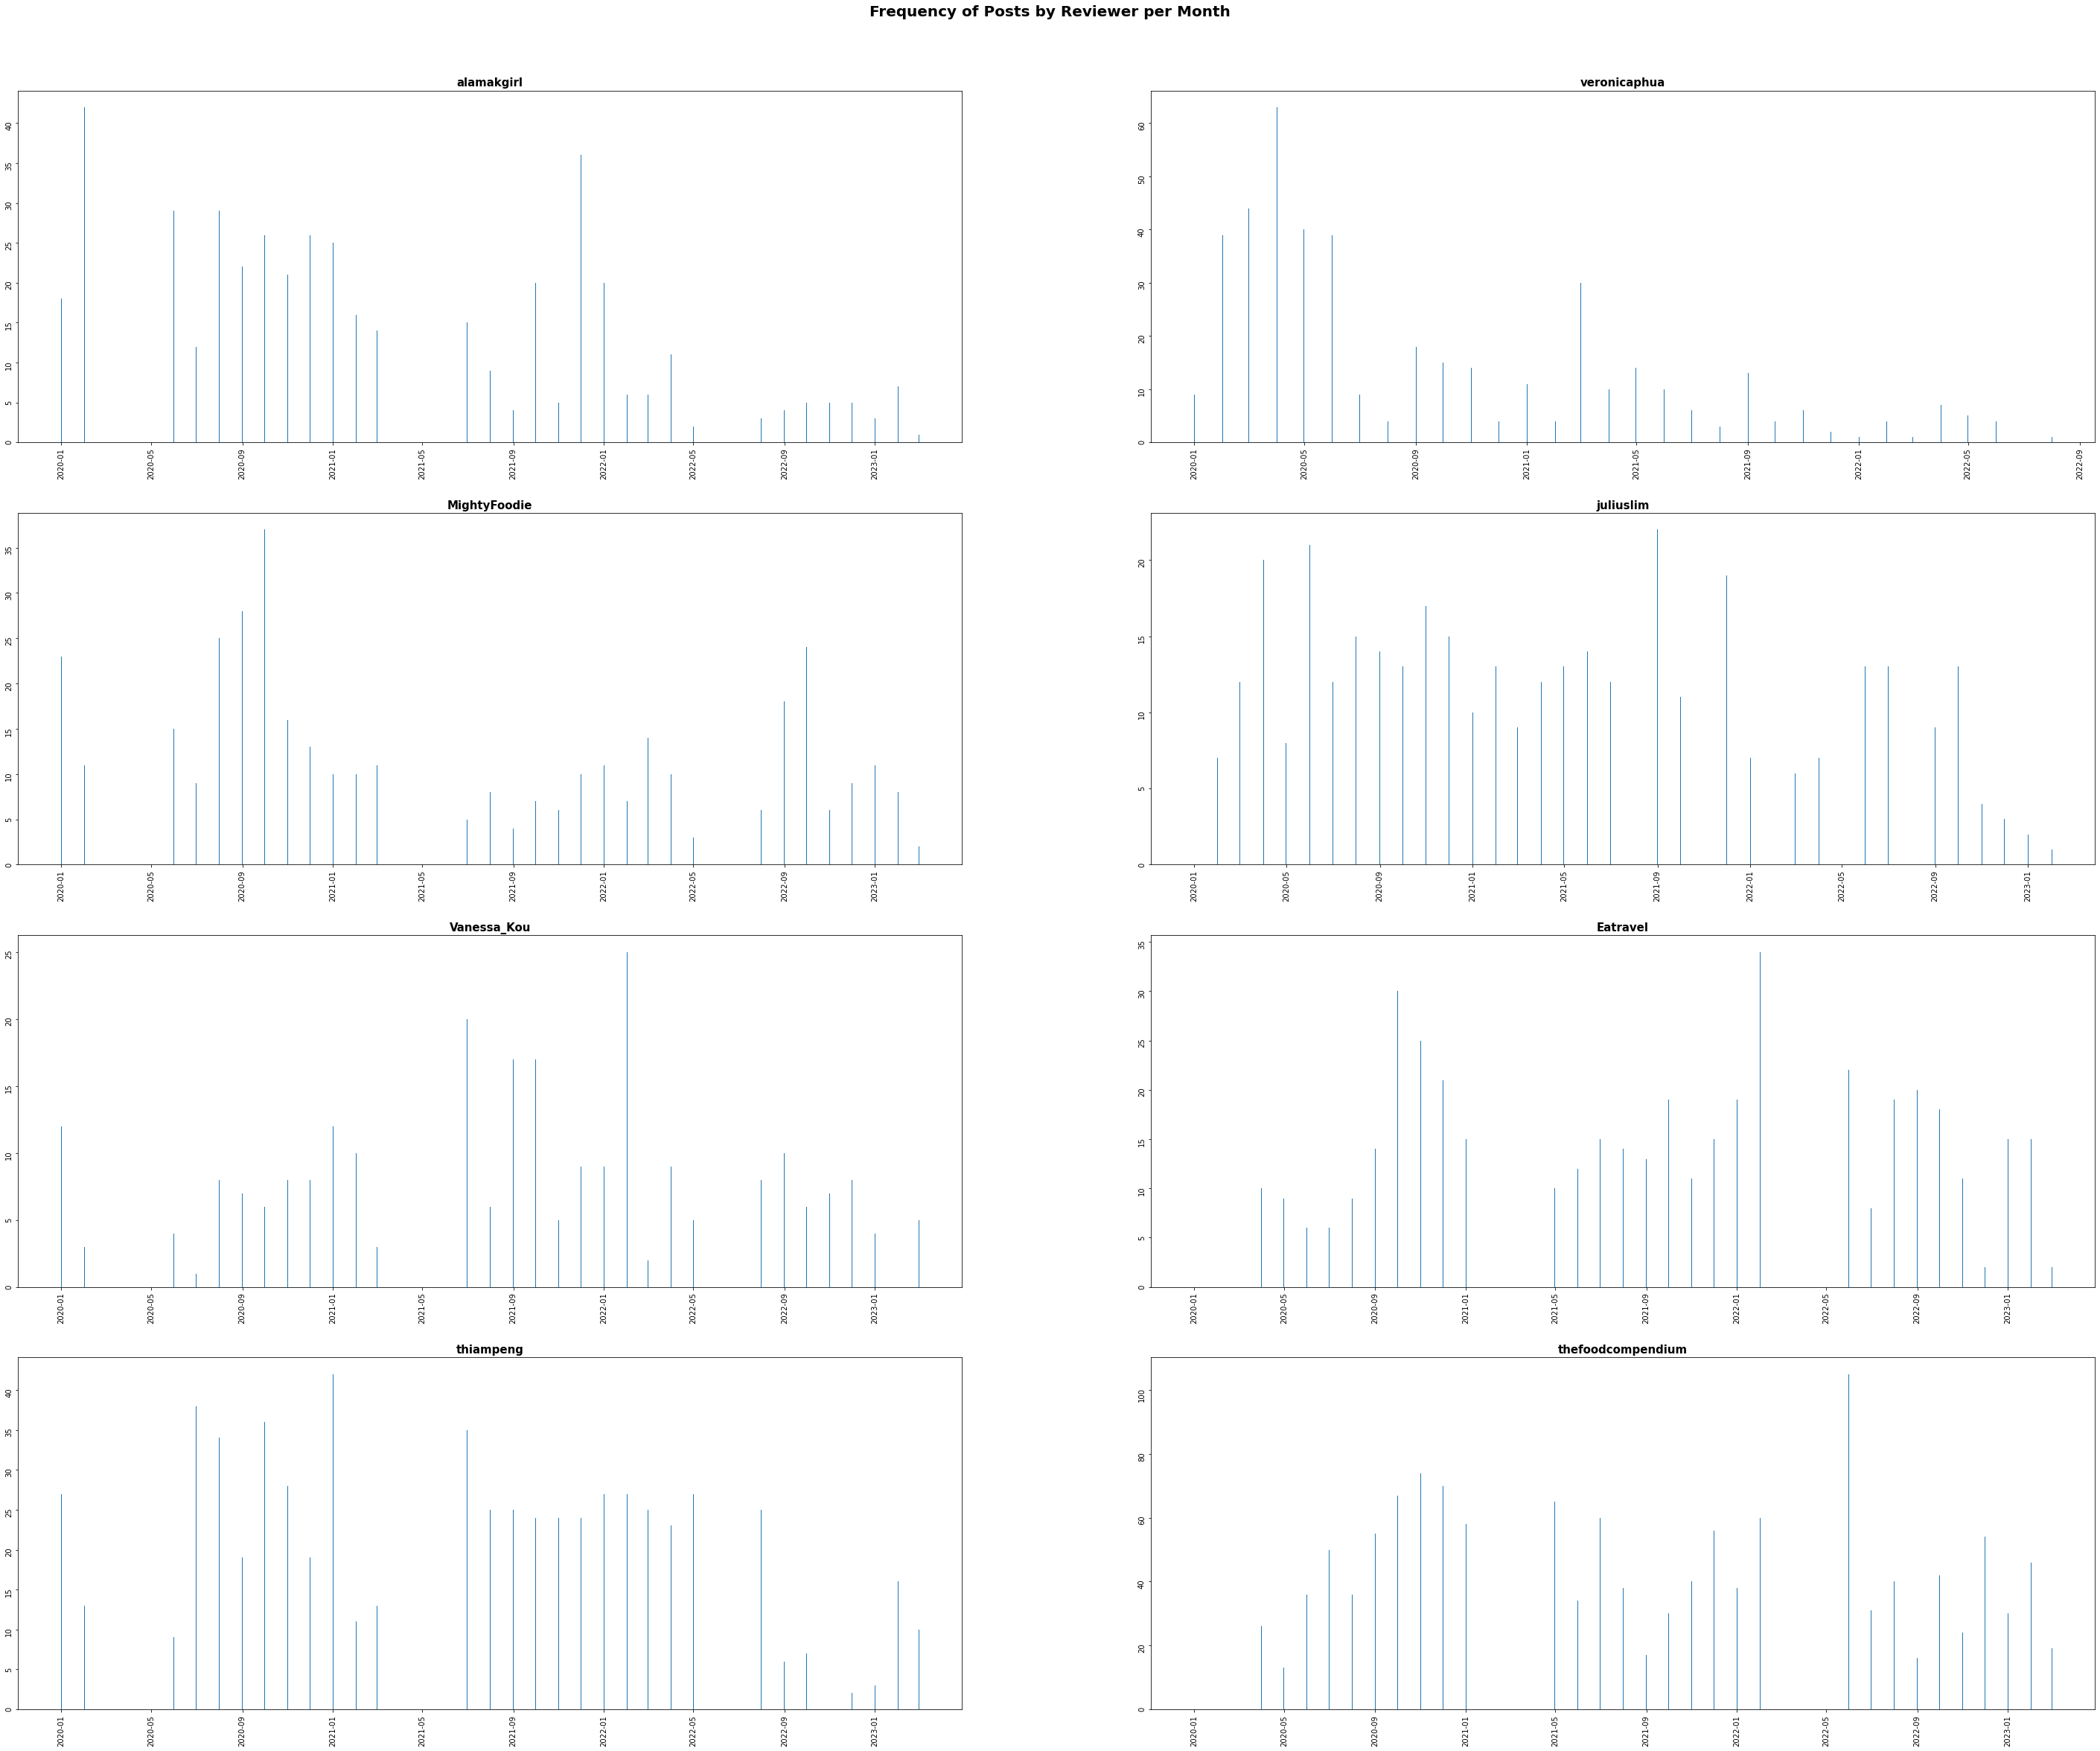

In [29]:
freq_alamakgirl = freq[freq['reviewer'] == 'alamakgirl']
#freq_alamakgirl.rename({0:'frequency'}, axis = 1)
freq_veronicaphua = freq[freq['reviewer'] == 'veronicaphua']
#freq_veronicaphua.rename({0:'frequency'}, axis = 1)
freq_MightyFoodie = freq[freq['reviewer'] == 'MightyFoodie']
#freq_MightyFoodie.rename({0:'frequency'}, axis = 1)
freq_juliuslim = freq[freq['reviewer'] == 'juliuslim']
#freq_juliuslim.rename({0:'frequency'}, axis = 1)
freq_Vanessa_Kou = freq[freq['reviewer'] == 'Vanessa_Kou']
#freq_Vanessa_Kou.rename({0:'frequency'}, axis = 1)
freq_Eatravel = freq[freq['reviewer'] == 'Eatravel']
#freq_Eatravel.rename({0:'frequency'}, axis = 1)
freq_thiampeng = freq[freq['reviewer'] == 'thiampeng']
#freq_thiampeng.rename({0:'frequency'}, axis = 1)
freq_thefoodcompendium = freq[freq['reviewer'] == 'thefoodcompendium']
#freq_thefoodcompendium.rename({0:'frequency'}, axis = 1)


fig, axs = plt.subplots(4,2, figsize=(50, 40))
axs[0][0].bar(freq_alamakgirl['DATE'], freq_alamakgirl[0])
axs[0][1].bar(freq_veronicaphua['DATE'], freq_veronicaphua[0])
axs[1][0].bar(freq_MightyFoodie['DATE'], freq_MightyFoodie[0])
axs[1][1].bar(freq_juliuslim['DATE'], freq_juliuslim[0])
axs[2][0].bar(freq_Vanessa_Kou['DATE'], freq_Vanessa_Kou[0])
axs[2][1].bar(freq_Eatravel['DATE'], freq_Eatravel[0])
axs[3][0].bar(freq_thiampeng['DATE'], freq_thiampeng[0])
axs[3][1].bar(freq_thefoodcompendium['DATE'], freq_thefoodcompendium[0])

fig.suptitle('Frequency of Posts by Reviewer per Month', fontsize=20, fontweight='extra bold', y=0.92, x=0.51)
axs[0][0].set_title('alamakgirl', fontsize=15, fontweight='bold')
axs[0][0].tick_params(labelrotation = 90)

axs[0][1].set_title('veronicaphua', fontsize=15, fontweight='bold')
axs[0][1].tick_params(labelrotation = 90)

axs[1][0].set_title('MightyFoodie', fontsize=15, fontweight='bold')
axs[1][0].tick_params(labelrotation = 90)

axs[1][1].set_title('juliuslim', fontsize=15, fontweight='bold')
axs[1][1].tick_params(labelrotation = 90)

axs[2][0].set_title('Vanessa_Kou', fontsize=15, fontweight='bold')
axs[2][0].tick_params(labelrotation = 90)

axs[2][1].set_title('Eatravel', fontsize=15, fontweight='bold')
axs[2][1].tick_params(labelrotation = 90)

axs[3][0].set_title('thiampeng', fontsize=15, fontweight='bold')
axs[3][0].tick_params(labelrotation = 90)

axs[3][1].set_title('thefoodcompendium', fontsize=15, fontweight='bold')
axs[3][1].tick_params(labelrotation = 90)

In [30]:
freq_by_month = reviewer_reviews.groupby(['DATE']).size().reset_index()
freq_by_month.rename({0:'freq'}, axis = 1)

,DATE,freq
0,2020-01-01,183
1,2020-02-01,143
2,2020-03-01,209
3,2020-04-01,168
4,2020-05-01,121
5,2020-06-01,159
6,2020-07-01,137
7,2020-08-01,160
8,2020-09-01,177
9,2020-10-01,230


Text(0.5, 1.0, 'Frequency of posts by Month')

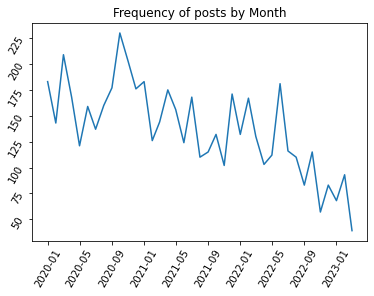

In [31]:
#freq_by_month.plot(x="DATE", y=[0], kind="bar")
plt.plot(freq_by_month['DATE'], freq_by_month[0])
plt.tick_params(labelrotation = 60)
title = "Frequency of posts by Month"
plt.title(title)


In [32]:
df_by_date = reviewer_reviews.groupby('cleaned_dates_datetime')['link'].count().reset_index().iloc[:-8,:]
df_by_date

,cleaned_dates_datetime,link
0,2020-01-01,13
1,2020-01-02,16
2,2020-01-03,13
3,2020-01-04,6
4,2020-01-05,6
...,...,...
1036,2023-02-22,6
1037,2023-02-24,7
1038,2023-02-25,2
1039,2023-02-26,16


Text(0, 0.5, 'Num Reviews Per Month')

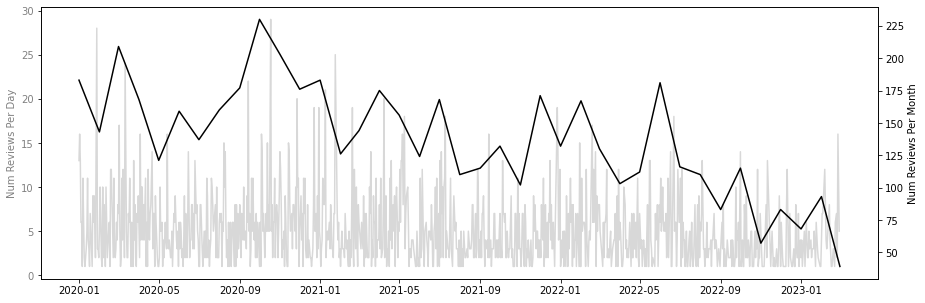

In [33]:
fig, ax1 = plt.subplots(figsize=(15,5))
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')

ax1.plot(df_by_date['cleaned_dates_datetime'],df_by_date['link'],  color = 'grey', alpha = 0.3)
ax1.set_ylabel('Num Reviews Per Day', color = 'grey')
ax1.tick_params(axis = 'y', labelcolor = 'grey')
ax1.grid(False)
ax2 = ax1.twinx()
ax2.plot(freq_by_month['DATE'],freq_by_month[0], color = 'black')
ax2.set_ylabel('Num Reviews Per Month')


## Location of Restaurants Reviewed

In [35]:
locations = reviewer_reviews['address'].unique()
print("No. of locations:", len(locations))

No. of locations: 571


In [37]:
#clean to see area
reviewer_reviews['region'] = reviewer_reviews['address'].apply(lambda x: str(x).replace(', Singapore', ''))
reviewer_reviews['region'] = reviewer_reviews['region'].apply(lambda x: "".join(filter(lambda x: not x.isdigit(),x)))

In [38]:
reviewer_reviews['region'].head(2)

12                   Goldhill Plaza            
31                   Joo Chiat Road            
Name: region, dtype: object

In [39]:
res = reviewer_reviews[['reviewer','region']].groupby('reviewer').nunique().reset_index()
res

,reviewer,region
0,Eatravel,61
1,MightyFoodie,91
2,Vanessa_Kou,57
3,alamakgirl,127
4,juliuslim,147
5,thefoodcompendium,178
6,thiampeng,119
7,veronicaphua,80


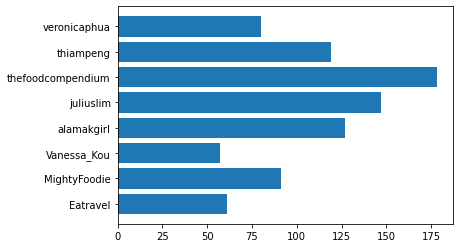

In [40]:
# num of region for each reviewer 
plt.barh(res.reviewer, res.region)
plt.show()

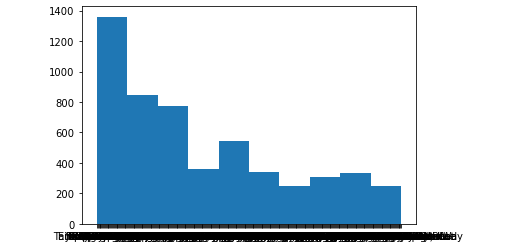

In [42]:
plt.hist(reviewer_reviews.region)
plt.show()